# Trabajo Práctico Análisis de Grafos

In [ ]:
integrantes = ["Gisela Brunetto","Maria Virginia Romero Messein"]
print('Integrantes: \n ',*integrantes, sep="\n")

Integrantes: 
 
Gisela Brunetto
Maria Virginia Romero Messein


El trabajo práctico de la materia consiste en el análisis de un conjunto de datos extraído de Twitter. La idea es emplear los conceptos de grafos vistos en clase sobre un caso real de actualidad.

## Dataset

El dataset consiste en un conjunto de hilos de tweets, con un total de ~150000 tweets, extraídos entre Enero y Marzo de 2021. La temática de los mismos está referida a la vacunación contra el covid-19 en Argentina.

Pueden descargar el dataset del siguiente [link](https://drive.google.com/file/d/1X_qKsE8muAnom2tDX4sLlmBAO0Ikfe_G/view?usp=sharing).

### Campos

- **created_at:** Fecha del tweet
- **id_str:** ID del tweet
- **full_text:** Contenido del tweet
- **in_reply_to_status_id:** ID del tweet inmediatamente anterior en el hilo
- **in_reply_to_user_id:** Autor del tweet inmediatamente anterior en el hilo
- **user.id:** Autor del tweet
- **user_retweeters:** Lista de ID de usuarios que retweetearon el tweet
- **sentiment:** Etiquetado manual que indica el sentimiento o intención del tweet con respecto al tweet anterior en el hilo

Ejemplo

<img src="./figuras/twitter-thread.jpg" width="500"/>

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!gdown https://drive.google.com/file/d/1-D4MqMtD3Xw-iFtG51TJtorK3eaoLz_C/view?usp=sharing --fuzzy

## Configuración inicial

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path



## Descargar el csv con los datos en este directorio

DATA_DIR = Path('/content/drive/MyDrive/Diplomatura_Famaf_2022/Optativas/Grafos/graphMachineLearning-main/notebooks/vacunas.csv')
INPUT_FILE = DATA_DIR / 'vacunas.csv'

## Creamos el directorio en caso de que no exista
#DATA_DIR.mkdir(parents=True, exist_ok=True)

### Cargamos el dataset

In [ ]:
dtypes = {
    'id_str': str,
    'full_text': str,
    'in_reply_to_status_id': str,
    'in_reply_to_user_id': str,
    'user.id': str
}
df = pd.read_csv(DATA_DIR, dtype=dtypes).dropna(subset=['user_retweeters'])
df['user_retweeters'] = df['user_retweeters'].apply(lambda x: [str(elem) for elem in eval(x)])
print('Shape:', df.shape)
df.head()

Shape: (155123, 8)


,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,"[2258074658, 159909978, 105301854, 290671142, ...",NaN
1,Sat Feb 20 03:19:59 +0000 2021,1362965193509265417,@Clon_43 @norabar Nora estaba indignada porque...,1362962469749153792,2737379453,32718111,[],NaN
2,Mon Feb 22 23:55:08 +0000 2021,1364000806740111363,"Bueno, Alberto dijo Salud o Economía. La salud...",NaN,NaN,252168075,"[1238117630696972289, 37232479, 12792246571247...",NaN
3,Tue Feb 23 00:09:14 +0000 2021,1364004354374696963,@spitta1969 Tuit del mes Spitta,1364000806740111363,252168075,1156346340802224128,[],NaN
4,Tue Feb 23 00:00:17 +0000 2021,1364002100364128260,@spitta1969 Estas onfire,1364000806740111363,252168075,153663816,[],NaN


### Observamos algunos ejemplos

In [ ]:
idx = 2
print('Texto:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Texto: Bueno, Alberto dijo Salud o Economía. La salud para ellos, la ruina económica para nosotros. No aclaró.
Retweets: 44


In [ ]:
idx = 405
print('Text:', df.full_text.values[idx])
print('Retweets:', len(df.user_retweeters.values[idx]))

Text: @norabar La evidencia científica que muestra la alta efectividad de tanto la Vitamina D como la ivermectina para prevenir las hospitalizaciones por COVID es hoy ya más que concluyente. Pero claro, eso arruinaría el negocio de las inyecciones...
Retweets: 0


### Calculamos la cantidad de hilos

In [ ]:
roots = df[df['in_reply_to_user_id'].isna()]
roots.shape

(3174, 8)

## Actividades

### Primera parte

#### **1. Construcción del grafo** 

Construir el **grafo de retweets**, definido de la siguiente manera:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

Con estos datos, el grafo debería tener alrededor de 40000 nodos y 90000 enlaces.

Considerar la versión no dirigida del grafo y estudiar su conectividad. Si existe una única "componente gigante", realizar el resto de las actividades sobre ella, en lugar de sobre el grafo completo.

Calcular las siguientes métricas globales del grafo:

- Grado medio
- Asortatividad
- Transitividad
- Coeficiente de clustering de Watts-Strogatz

**Opcional:** Comparar las métricas calculadas anteriormente con las de un grafo aleatorio con la misma distribución de grado. Pueden utilizar para ello este [método](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html?highlight=configuration#networkx.generators.degree_seq.configuration_model). Con esto en mente, comentar si los valores obtenidos anteriormente difieren significativamente del caso aleatorio.


#### **2. Centralidad**

Calcular 5 métricas de centralidad de nodos. Graficar la distribución de cada una de ellas ¿Existe alguna correlación entre las distintas centralidades?

Hacer un ranking con los 10 nodos más centrales para cada métrica. ¿Hay coincidencia entre los rankings?. ¿Qué características tienen los usuarios más centrales y sus respectivos tweets?

**Opcional:** Determinar si existe alguna correlación entre la centralidad de un nodo y su actividad en red social. Es decir, evaluar si los usuarios que más escriben son los más centrales o no.

**Observación:** El cálculo de centralidad puede ser costoso, por lo que es recomendable utilizar alguna librería más eficiente que `networkx`. La más simple de usar es `igraph` (ver [documentación](https://igraph.readthedocs.io/en/stable/)). En particular, resulta práctico utilizar el método `igraph.Graph().from_networkx()`, para convertir fácilmente un grafo de `networkx` a `igraph`.

#### **3. Comunidades**

Utilizar el algoritmo de Louvain con el parámetro "resolución" igual a 1. Caracterizar las comunidades halladas (cantidad, distribución de tamaños). Utilizar la modularidad y otras dos métricas a elección para evaluar la calidad de la partición encontrada. 

Variar el parámetro "resolución" y observar cómo cambia la distribución de comunidades encontradas. ¿Existe algún valor para el cual se identifiquen dos grandes comunidades?

Elegir otro algoritmo de detección de comunidades y comparar los resultados con los obtenidos anteriormente.

**Opcional:** Correr el algoritmo de Louvain con distintas semillas aleatorias. Utilizar alguna métrica de comparación externa entre las particiones obtenidas para determinar en qué medida depende el algoritmo de la condición inicial.

#Resolución primera parte

Bibliotecas a utilizar

In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import igraph as ig
import networkx as nx


import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns

%matplotlib inline

sns.set_context('talk')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##**1. Construcción del grafo dirigido** 

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy = df_copy.explode('user_retweeters').reset_index(drop=True) 

In [ ]:
df_copy

,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,2258074658,NaN
1,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,159909978,NaN
2,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,105301854,NaN
3,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,290671142,NaN
4,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,208721168,NaN
...,...,...,...,...,...,...,...,...
320943,Tue Jan 12 23:24:10 +0000 2021,1349135109010677767,@Die_IsCast @norabar @enzosebastin221 Retuitea...,1349122147587940353,2955376486,176835482,NaN,NaN
320944,Wed Jan 13 01:56:56 +0000 2021,1349173553833381888,"@todosflotan @norabar @enzosebastin221 Sí, sí,...",1349135109010677767,176835482,2955376486,NaN,NaN
320945,Wed Jan 13 02:02:07 +0000 2021,1349174860702953474,@Die_IsCast @norabar @enzosebastin221 seguí co...,1349173553833381888,2955376486,176835482,NaN,NaN
320946,Tue Jan 12 15:07:16 +0000 2021,1349010059712491522,"@mirtapsp @todosflotan @norabar Nora, trabaja ...",1349002034968719360,138734328,1219302815916527618,NaN,NaN


In [ ]:
df_copy.shape

(320948, 8)

Eliminamos aquellos tweets que no fueron retwitteados, bajo las condiciónes:

- Tipo de grafo: Dirigido
- Nodos: ID de los usuarios
- Enlaces: (Usuario A) ---> (Usuario B) si B retweeteó algún tweet de A

In [ ]:
df_copy = df_copy.dropna(subset=['user_retweeters'], axis=0)

Eliminamos los duplicados

In [ ]:
df_copy.duplicated().sum()

51

In [ ]:
df_dirigido = df_copy.drop_duplicates()
df_dirigido

,created_at,id_str,full_text,in_reply_to_status_id,in_reply_to_user_id,user.id,user_retweeters,sentiment
0,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,2258074658,NaN
1,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,159909978,NaN
2,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,105301854,NaN
3,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,290671142,NaN
4,Sat Feb 20 03:09:10 +0000 2021,1362962469749153792,Seguimos esperando el comunicado de @norabar r...,NaN,NaN,2737379453,208721168,NaN
...,...,...,...,...,...,...,...,...
320756,Tue Jan 12 13:02:18 +0000 2021,1348978612632956929,@Argentano4 @OEdurne @norabar @dianamaffia #re...,1348972409420984320,1345042868524744708,437640516,1314707677096927234,NaN
320843,Tue Jan 12 12:52:46 +0000 2021,1348976211112898560,@miseriadigna22 @Ing_Torta @peredaarias @norab...,1348974971490619395,4819951305,58065646,353854993,NaN
320906,Wed Jan 13 00:04:36 +0000 2021,1349145284614512643,@DeChouza @norabar Y así fue como Nora fue per...,1349144383799652353,1266212657272696832,79840600,1363288094,NaN
320907,Wed Jan 13 00:04:36 +0000 2021,1349145284614512643,@DeChouza @norabar Y así fue como Nora fue per...,1349144383799652353,1266212657272696832,79840600,2258074658,NaN


Hacemos un control general de los resultados anteriores

In [ ]:
df_dirigido.duplicated().sum()

0

In [ ]:
df_dirigido.shape

(187246, 8)

In [ ]:
df_dirigido.isna().sum()

created_at                    0
id_str                        0
full_text                     0
in_reply_to_status_id     85915
in_reply_to_user_id       85417
user.id                       0
user_retweeters               0
sentiment                186706
dtype: int64

###Creación del grafo dirigido con NetworkX

In [ ]:
#Creamos el grafo dirigido
G = nx.DiGraph()

In [ ]:
#Definimos los nodos
G.add_nodes_from(df_dirigido['user.id'])

In [ ]:
#Definimos las aristas (enlaces)
for origen, destino, in zip(df_dirigido['user.id'], df_dirigido['user_retweeters']):
    G.add_edge(origen, destino)

In [ ]:
print(f'Cantidad de nodos: {G.number_of_nodes()}')
print(f'Cantidad de links: {G.number_of_edges()}')

Cantidad de nodos: 39800
Cantidad de links: 93692


In [ ]:
#A = nx.adjacency_matrix(G)

###Obtención de la componente gigante

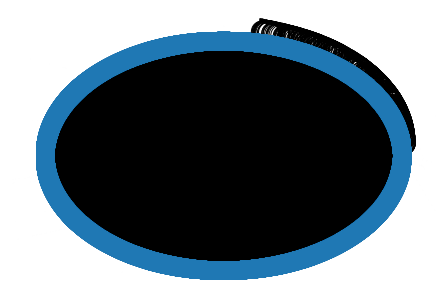

In [ ]:
nx.draw_circular(G) #confiemos en que hay una componente gigante

In [ ]:
#Consultamos si el grafo es fuerte o debilmente conexo
print("¿Es fuertemente conexo?", nx.is_strongly_connected(G))
print("¿Es debilmente conexo?", nx.is_weakly_connected(G))

¿Es fuertemente conexo? False
¿Es debilmente conexo? False


In [ ]:
#Del grafo debilmente conexo nos quedamos con la componente conexa más grande
largest_cc = max(nx.weakly_connected_components(G), key=len)
H = G.subgraph(largest_cc)

In [ ]:
#Componente gigante convertida en grafo no dirigido
HC = nx.Graph(H) 

In [ ]:
print(f'Cantidad de nodos de la componente gigante: {HC.number_of_nodes()}')
print(f'Cantidad de links de la componente gigante: {HC.number_of_edges()}')

Cantidad de nodos de la componente gigante: 38998
Cantidad de links de la componente gigante: 92830


###Estadística de nodos

Guardamos los estadísticos en el siguiente DataFrame

In [ ]:
df_nodos = pd.DataFrame(index=list(HC.nodes())) #indice son los nodos


In [ ]:
df_nodos.shape

(38998, 0)

####Grado

In [ ]:
deg_seq = np.array([k for v, k in HC.degree()])
df_nodos['degree'] = deg_seq
df_nodos

,degree
2737379453,9
252168075,8207
1285055382210125832,8
2915779377,28
73102744,5362
...,...
1125797047444090880,1
1666542252,1
1140777921084305408,2
2650545267,1


In [ ]:
degree_mean = df_nodos['degree'].mean()
degree_mean

4.760756961895482

####Coeficiente de clustering de Watts-Strogatz

In [ ]:
#Cws:= Coeficiente de clustering de Watts-Strogatz (transitividad)
clustering_coefficient = nx.clustering(HC)
df_nodos['Cws'] = list(clustering_coefficient.values())

In [ ]:
Cws_mean=df_nodos.Cws.mean() 
Cws_mean

0.10189800595168676

In [ ]:
print(nx.average_clustering(HC))

0.10189800595168691


####Transitividad (Newman)

Tambien llamado coeficiente de agrupamiento global

In [ ]:
transitivity_newman= nx.transitivity(HC)
df_nodos['Newman'] = transitivity_newman
df_nodos

,degree,Cws,Newman
2737379453,9,0.000000,0.001612
252168075,8207,0.000558,0.001612
1285055382210125832,8,0.214286,0.001612
2915779377,28,0.063492,0.001612
73102744,5362,0.000496,0.001612
...,...,...,...
1125797047444090880,1,0.000000,0.001612
1666542252,1,0.000000,0.001612
1140777921084305408,2,0.000000,0.001612
2650545267,1,0.000000,0.001612


In [ ]:
Newman_mean=df_nodos.Newman.mean() 
Newman_mean

0.0016123660217598863

In [ ]:
print(nx.transitivity(HC))

0.0016123660217598865


####Asortatividad

In [ ]:
#asortatividad
r = nx.degree_assortativity_coefficient(HC)


In [ ]:
r

-0.22289852028043194

Si la asortatividad es negativa, un nodo con un grado alto tenderá a estar conectado a nodos con un nivel menor de grado y viceversa.

###Resumen de métricas globales

In [ ]:
# Cws := Coeficiente de clustering de Watts-Strogatz (Transitividad)
# Tnewman := Transitividad de Newman

columns = ['Grado medio', 'Asortatividad', 'Cws', 'Tnewman']
metric = [degree_mean, r, Cws_mean, Newman_mean]

global_metric = pd.DataFrame(metric,columns, columns=['metricas_globales'])

global_metric

,metricas_globales
Grado medio,4.760757
Asortatividad,-0.222899
Cws,0.101898
Tnewman,0.001612


La diferencia entre transitividad y coeficiente de clustering de Watts-Strogatz se puede deber a que  esta última métrica coloca más peso en los nodos de bajo grado, mientras que la relación de transitividad coloca más peso en los nodos de alto grado.

In [ ]:
#g_random = nx.binomial_graph(HC.number_of_nodes(),0.5)

## **2. Centralidad**

Primero convertimos un grafo de Networkx a un grafo de igraph, ya que para algunas métricas de centralidad nos ahorraremos tiempo y recursos.

In [ ]:
HC_ig = ig.Graph().from_networkx(HC)

####**Betweenness**

In [ ]:
#Betweenness 
btw = HC_ig.betweenness()

Respecto a esta medida de centralidad, Newman recomienda normalizar esta métrica, textualmente señala:


The values of betweenness calculated here are raw path counts, but it is sometimes convenient to normalize betweenness in some way. Several of the standard computer programs for network analysis, such as Pajek and UCINET, perform such normalizations. One natural choice is to normalize the path count by dividing by the total number of (ordered) vertex pairs, which is $n^2$, so that betweenness becomes the fraction (rather than the number) of paths that run through a given vertex ${ }^{1}$.
$$
x_i=\frac{1}{n^2} \sum_{s t} \frac{n_{s t}^i}{g_{s t}^i} .
$$
With this definition, the values of the betweenness lie strictly between zero and one $^{(1)}$.

(1) Mark Newman, Networks An Introduction, pp. 190.

In [ ]:
btw_normalizado=[n * (1/(HC.number_of_nodes()**2)) for n in btw]

####**Eigenvector**

In [ ]:
eigenvector = nx.eigenvector_centrality_numpy(HC)

####**Influencia colectiva**

In [ ]:
def get_CI_nx(g: nx.Graph) -> list:
    """
    Compute Collective Influence of each node at length 1.
    """
    ci_values = []
    for i, v in enumerate(g.nodes()):
        nn_influence = sum([g.degree(w) - 1 for w in g.neighbors(v)])
        ci = (g.degree(v) - 1) * nn_influence
        ci_values.append(ci)
    return ci_values

In [ ]:
collective_influence = get_CI_nx(HC)

####**Closeness**

In [ ]:
closeness = HC_ig.closeness()

###**Resumen de medidas de centralidad**

In [ ]:
df_nodos['betweenness'] = btw
df_nodos['betweenness_normalizado'] = btw_normalizado
df_nodos['eigenvector'] = list(eigenvector.values())
df_nodos['CI'] = collective_influence
df_nodos['closeness'] = closeness
df_nodos

,degree,Cws,Newman,betweenness,betweenness_normalizado,eigenvector,CI,closeness
2737379453,9,0.000000,0.001612,7.811164e+04,0.000051,2.743114e-04,720,0.244898
252168075,8207,0.000558,0.001612,2.703364e+08,0.177754,2.710358e-01,437429036,0.392229
1285055382210125832,8,0.214286,0.001612,1.968020e+04,0.000013,3.927552e-03,81480,0.304255
2915779377,28,0.063492,0.001612,6.080969e+04,0.000040,3.878375e-03,245241,0.285205
73102744,5362,0.000496,0.001612,1.259533e+08,0.082818,3.520101e-01,170222472,0.371290
...,...,...,...,...,...,...,...,...
1125797047444090880,1,0.000000,0.001612,0.000000e+00,0.000000,3.625702e-03,0,0.284754
1666542252,1,0.000000,0.001612,0.000000e+00,0.000000,3.625702e-03,0,0.284754
1140777921084305408,2,0.000000,0.001612,3.899600e+04,0.000026,2.300869e-06,6,0.199299
2650545267,1,0.000000,0.001612,0.000000e+00,0.000000,6.382726e-07,0,0.182163


Las métricas de centralidad elegidas son las siguientes:

In [ ]:
df_centralidad = df_nodos[['degree','betweenness', 'betweenness_normalizado', 'eigenvector', 'CI', 'closeness']]
df_centralidad

,degree,betweenness,betweenness_normalizado,eigenvector,CI,closeness
2737379453,9,7.811164e+04,0.000051,2.743114e-04,720,0.244898
252168075,8207,2.703364e+08,0.177754,2.710358e-01,437429036,0.392229
1285055382210125832,8,1.968020e+04,0.000013,3.927552e-03,81480,0.304255
2915779377,28,6.080969e+04,0.000040,3.878375e-03,245241,0.285205
73102744,5362,1.259533e+08,0.082818,3.520101e-01,170222472,0.371290
...,...,...,...,...,...,...
1125797047444090880,1,0.000000e+00,0.000000,3.625702e-03,0,0.284754
1666542252,1,0.000000e+00,0.000000,3.625702e-03,0,0.284754
1140777921084305408,2,3.899600e+04,0.000026,2.300869e-06,6,0.199299
2650545267,1,0.000000e+00,0.000000,6.382726e-07,0,0.182163


### Distribución de métricas de centralidad

Para analizar las distribuciones individuales, primero miramos el resumen de métricas:

In [ ]:
df_centralidad.describe()

,degree,betweenness,betweenness_normalizado,eigenvector,CI,closeness
count,38998.000000,3.899800e+04,38998.000000,3.899800e+04,3.899800e+04,38998.000000
mean,4.760757,5.419226e+04,0.000036,2.526771e-03,6.121645e+04,0.268301
std,70.009010,2.057104e+06,0.001353,4.388424e-03,2.740194e+06,0.030144
min,1.000000,0.000000e+00,0.000000,1.359044e-11,0.000000e+00,0.130407
25%,1.000000,0.000000e+00,0.000000,2.238487e-04,0.000000e+00,0.254825
50%,1.000000,0.000000e+00,0.000000,2.455509e-03,0.000000e+00,0.272840
75%,3.000000,2.471579e+03,0.000002,3.554302e-03,8.239000e+03,0.284754
max,8207.000000,2.703364e+08,0.177754,3.620905e-01,4.374290e+08,0.398115


Este resumen  nos informa que, salvo "closeness", podemos sospechar (mirando cuán cerca están los valores de media y mediana) que el resto de las distribuciones serán bastante asimétricas y no se les puede asociar cierto grado de normalidad. 

Observar que el $50 \%$ de los nodos tienen un valor "betweenness" e influencia colectiva igual a cero. Este comportamiento también lo tiene "degree" pero con el valor 1, por lo cual es necesario pensar en alguna transformación de escala para hacer interpretables los histogramas.

#####**Distribución de degree**

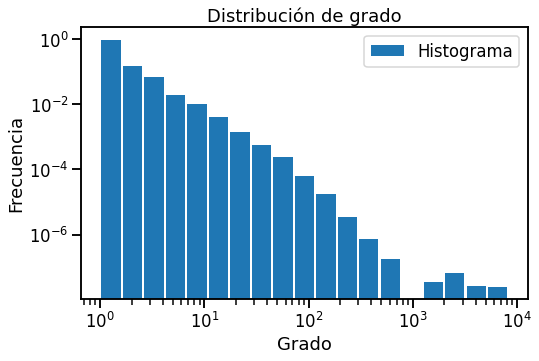

In [ ]:
#El grafo debe estar en formato igraph
degree_seq_ig= HC_ig.degree()
kmin_ig = min(degree_seq_ig)
kmax_ig = max(degree_seq_ig)
bins = np.logspace(np.log10(kmin_ig), np.log10(kmax_ig), 20, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")
ax.hist(degree_seq_ig, bins=bins,  density=True, rwidth=0.9, label="Histograma")
ax.legend()
plt.title("Distribución de grado")
plt.show()


Como se puede observar (y se espera), la distribución de intermediación del grado de los nodos sigue una ley de potencia.

#####**Distribución de Betweenness**

Para estudiar la distridución del "betweenness", no podemos emplear la escala logarítmica en el eje de las x puesto que tenemos como valor mínimo al cero. Aplicando escala logarítmica sólo al eje de las coordenadas, es decir a las frecuencias absolutas, el histograma de distribución es el siguiente:

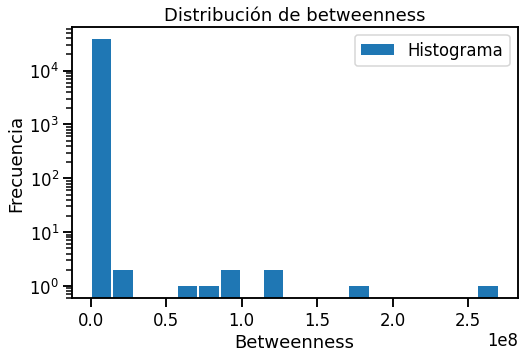

In [ ]:
datos_b = df_centralidad['betweenness'].tolist()
kmin_b = min(datos_b) #el minimo es cero, luego el log de cero no está definido
kmax_b = max(datos_b)
bins_b = np.linspace(kmin_b, kmax_b, 20, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 5))
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Betweenness")
ax.hist(datos_b, bins=bins_b, rwidth=0.9, label="Histograma")
ax.legend()
plt.title("Distribución de betweenness")
plt.show()




Este histograma no nos ayuda a visualizar de forma clara la distribución de esta variable. Tal como sugiere Newman, a veces brinda más información observar el "betweenness" normalizado por lo que realizamos un histograma tomando en cuenta esto.

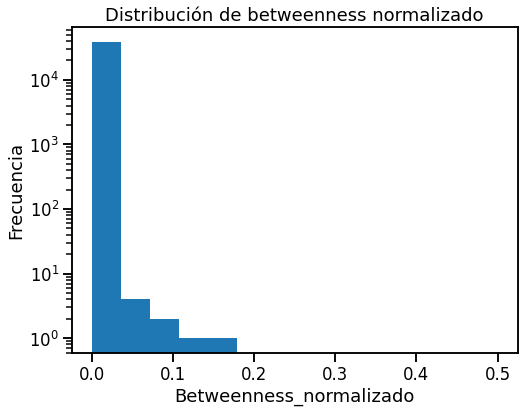

In [ ]:
datos_b_n = df_centralidad['betweenness_normalizado'].tolist()
fig, ax = plt.subplots(figsize=(8,6))
bins_b_n = np.linspace(0, 0.5, 15, endpoint=True)
plt.hist(x=df_centralidad['betweenness_normalizado'], bins=bins_b_n)
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Betweenness_normalizado")
#ax.set_xscale('log')
plt.title("Distribución de betweenness normalizado")
ax.set_yscale('log')
plt.show()

Creemos que esta visualización para "betweenness" es más sencilla de interpretar en términos de distribución. Además concuerda con lo que dice Newman respecto a la distribución de "betweennes", esto es, que al igual que "eigenvector", tiende a tener distribuciones sesgadas a la derecha en la mayoría de las redes. 


In [ ]:
# df_1 = df_centralidad[df_centralidad['betweenness'] == 0][['degree']].value_counts()
# df_1

#####**Distribución de Influecia Colectiva**

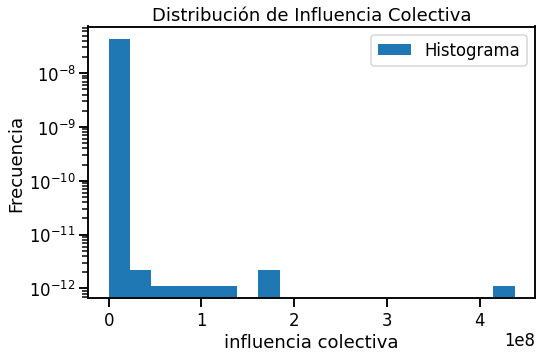

In [ ]:
seq_ig_ic=df_centralidad['CI'].tolist()

kmin_ic = min(seq_ig_ic)
kmax_ic = max(seq_ig_ic)

bins_ic = np.linspace(kmin_ic, kmax_ic, 20)

fig, ax = plt.subplots(figsize=(8, 5))
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("influencia colectiva")
ax.hist(seq_ig_ic, bins=bins_ic,  density=True, label="Histograma")
ax.legend()
plt.title("Distribución de Influencia Colectiva")
plt.show()


La fórmula de influencia colectiva para el nodo i, en este caso con $l=1$:
 
$$
\mathrm{CI}_{\ell}(i)=\left(k_i-1\right) \sum_{j \in \partial \overline{\partial a l l}(i, \ell)}\left(k_j-1\right)
$$

Nos dice que el nodo de grado 1 $(k_i=1)$ tendrá influencia colectiva nula, por lo que vamos a prescindir de estos user_id para obtener una distribución más precisa que la anterior, a expensas de saber que ya de por sí presenta un insesgamiento hacia la derecha cuando consideramos influencia colectiva nula.

In [ ]:
df_0 = df_centralidad[df_centralidad['degree'] != 1]
df_0

,degree,betweenness,betweenness_normalizado,eigenvector,CI,closeness
2737379453,9,7.811164e+04,5.136072e-05,0.000274,720,0.244898
252168075,8207,2.703364e+08,1.777542e-01,0.271036,437429036,0.392229
1285055382210125832,8,1.968020e+04,1.294032e-05,0.003928,81480,0.304255
2915779377,28,6.080969e+04,3.998417e-05,0.003878,245241,0.285205
73102744,5362,1.259533e+08,8.281803e-02,0.352010,170222472,0.371290
...,...,...,...,...,...,...
186874830,4,7.799100e+04,5.128139e-05,0.002747,24651,0.281770
3352557767,2,3.899600e+04,2.564103e-05,0.000092,5,0.242815
1347979629940924420,2,1.131575e+03,7.440439e-07,0.003610,5434,0.277576
1329028732183601156,2,4.144517e+01,2.725143e-08,0.000010,10,0.206565


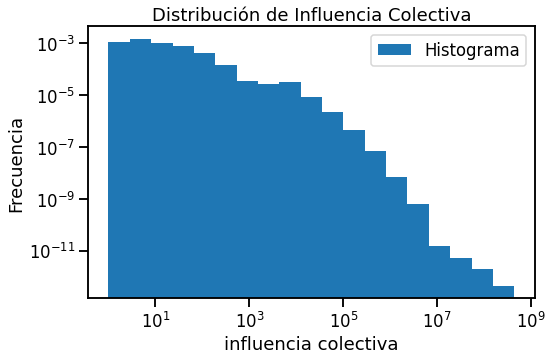

In [ ]:
seq_ig_CI =df_0['CI'].tolist()

kmin_CI = min(seq_ig_CI)
kmax_CI = max(seq_ig_CI)

bins_CI = np.logspace(np.log10(kmin_CI), np.log10(kmax_CI), 20, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("influencia colectiva")
ax.hist(seq_ig_CI, bins=bins_CI,  density=True, label="Histograma")
ax.legend()
plt.title("Distribución de Influencia Colectiva")
plt.show()

Analizando los nodos con influencia colectiva distinta a cero, podemos pensar que existe una distribucion de intermediación de ley de potencia, además de ser insesgada. Se puede observar que hay pocos nodos con influencia colectiva grande.

#####**Distribución de Eigenvector**

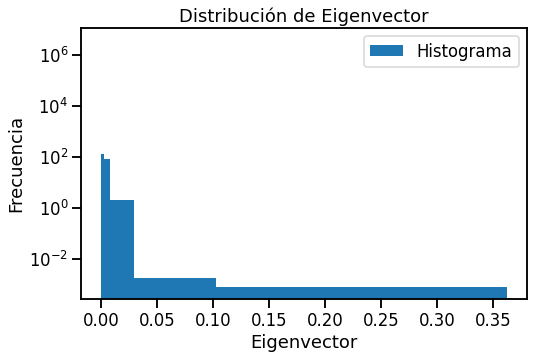

In [ ]:

seq_ig_ev = df_centralidad['eigenvector'].tolist()

kmin_ev = min(seq_ig_ev)
kmax_ev = max(seq_ig_ev)

bins_ev = np.logspace(np.log10(kmin_ev), np.log10(kmax_ev), 20, endpoint=True)

fig, ax = plt.subplots(figsize=(8, 5))
#ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Eigenvector")
ax.hist(seq_ig_ev, bins=bins_ev,  density=True, label="Histograma")
ax.legend()
plt.title("Distribución de Eigenvector")
plt.show()

La centralidad del vector propio se puede considerar como una forma extendida de centralidad de grado, en la que tomamos en cuenta no solo cuántos vecinos tiene un vértice, sino también qué tan centrales son esos vecinos. Dada su similitud con la centralidad de grado, la centralidad del vector propio a menudo tiene una distribución muy sesgada hacia la derecha [Newman, pp. 261].

#####**Distribución de Closeness**

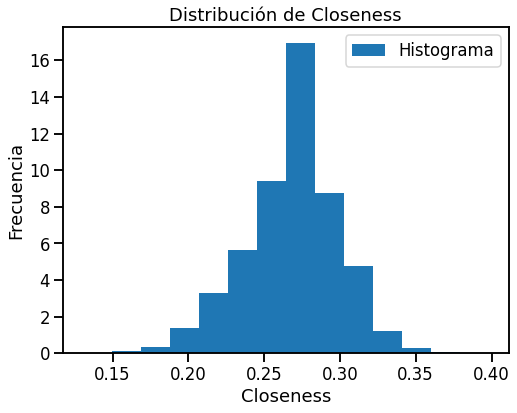

In [ ]:
seq_ig_c=df_centralidad['closeness'].tolist()

kmin_c = min(seq_ig_c)
kmax_c = max(seq_ig_c)

bins_c = np.linspace(kmin_c, kmax_c, 15, endpoint=True)

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(seq_ig_c, bins=bins_c,  density=True, label="Histograma")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Closeness")
ax.legend()
plt.title("Distribución de Closeness")
plt.show()


El histograma se asemeja a una distribución normal, esta distribución no sigue una ley de potencia.

###Correlación entre las métrica de centralidad

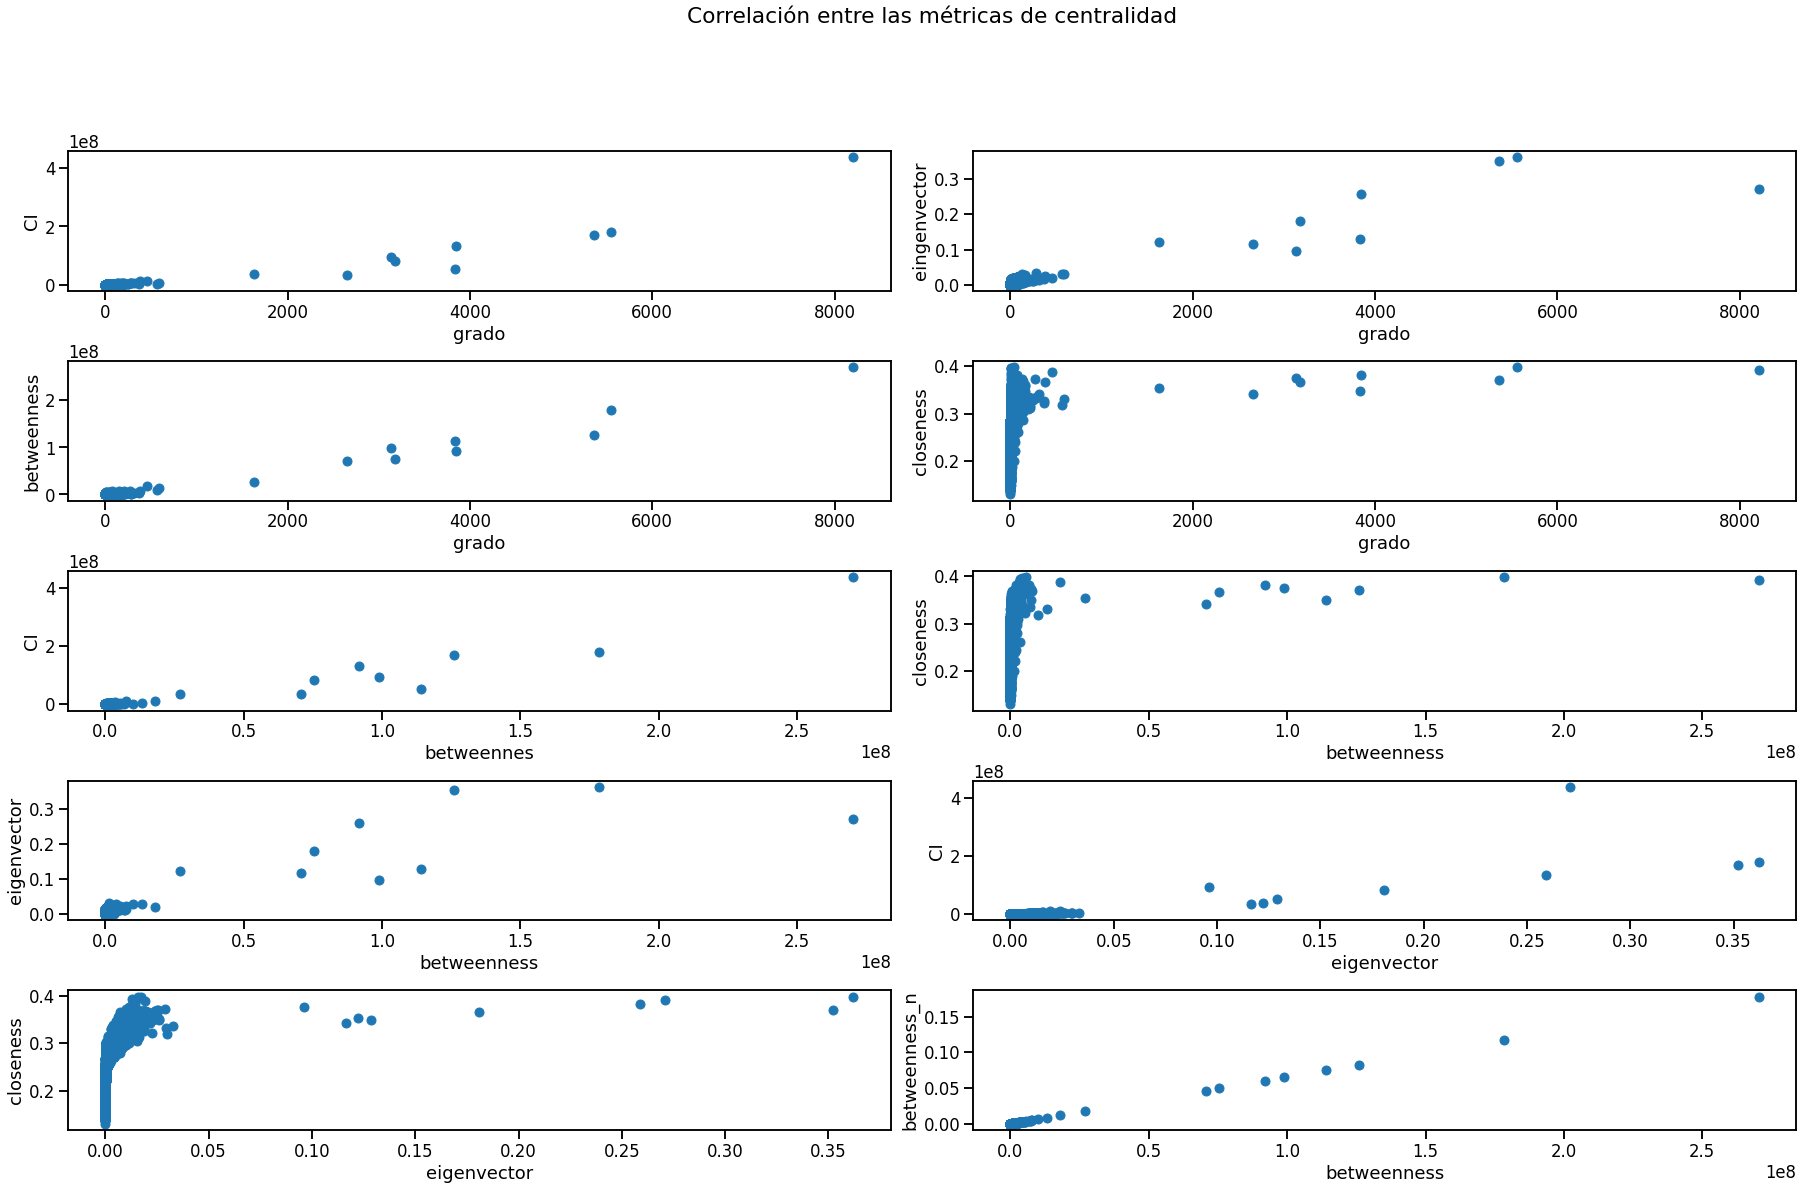

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(30,20))

# Dibujar gráficos
ax[0, 1].plot(df_centralidad.degree, df_centralidad.eigenvector, 'o')
ax[0, 1].set_xlabel(r'grado')
ax[0, 1].set_ylabel(r'eingenvector')

ax[1, 0].plot(df_centralidad.degree, df_centralidad.betweenness, 'o')
ax[1, 0].set_xlabel(r'grado')
ax[1, 0].set_ylabel(r'betweenness')

ax[0, 0].plot(df_centralidad.degree, df_centralidad.CI, 'o')
ax[0, 0].set_xlabel(r'grado')
ax[0, 0].set_ylabel(r'CI')

ax[1, 1].plot(df_centralidad.degree, df_centralidad.closeness, 'o')
ax[1, 1].set_xlabel(r'grado')
ax[1, 1].set_ylabel(r'closeness')

ax[2, 0].plot(df_centralidad.betweenness, df_centralidad.CI, 'o')
ax[2, 0].set_xlabel(r'betweennes')
ax[2, 0].set_ylabel(r'CI')

ax[2, 1].plot(df_centralidad.betweenness, df_centralidad.closeness,  'o')
ax[2, 1].set_xlabel(r'betweenness')
ax[2, 1].set_ylabel(r'closeness')

ax[3, 0].plot(df_centralidad.betweenness, df_centralidad.eigenvector, 'o')
ax[3, 0].set_xlabel(r'betweenness')
ax[3, 0].set_ylabel(r'eigenvector')

ax[3, 1].plot(df_centralidad.eigenvector, df_centralidad.CI, 'o')
ax[3, 1].set_xlabel(r'eigenvector')
ax[3, 1].set_ylabel(r'CI')

ax[4, 0].plot(df_centralidad.eigenvector, df_centralidad.closeness, 'o')
ax[4, 0].set_xlabel(r'eigenvector')
ax[4, 0].set_ylabel(r'closeness')

ax[4, 1].plot(df_centralidad.betweenness, df_centralidad.betweenness_normalizado,  'o')
ax[4, 1].set_xlabel(r'betweenness')
ax[4, 1].set_ylabel(r'betweenness_n')


# Establecer título

plt.suptitle("Correlación entre las métricas de centralidad")


plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    wspace=0.1, 
                    hspace=0.5)

# Mostrar
plt.show()

Graficamente se puede observar que hay correlación lineal positiva entre todas las métricas

In [ ]:
columnas=['degree','betweenness', 'eigenvector', 'CI', 'closeness', 'betweenness_normalizado']

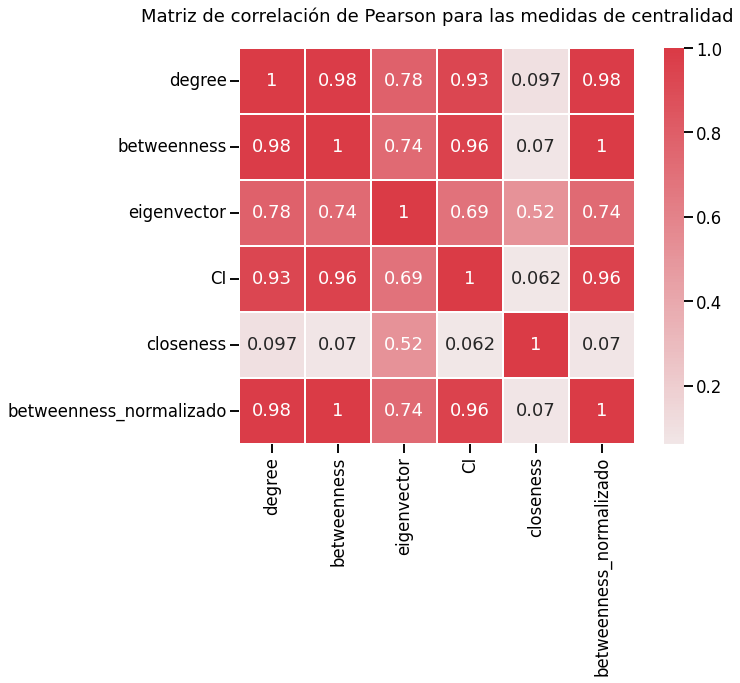

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_centralidad[columnas].corr(), cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)


plt.title('Matriz de correlación de Pearson para las medidas de centralidad\n')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.65,
                    wspace=0.4, 
                    hspace=0.4)


plt.show()

La matriz de correlación lineal nos dice que existe alta correlación positiva de a pares entre el "grado" del nodo y el resto de las variables, excepto con "closeness". Tener en cuenta que el coeficiente de correlación de Pearson es simétrico, por lo cual los valores de correlación de a pares serán identicos y por lo tanto la interpretación no difiere.

En el caso de  "eigenvector" presenta correlación positiva moderada con "betweenness", "CI" y "degree", mientras que con "closeness" la correlación es debilmente positiva.

Notar que "closeness" presenta correlación positiva (debil) solamente con "eigenvector".




### Ranking

In [ ]:
#ranking
columns = columnas
data = {}
for col in columns:
    top_families = df_centralidad.nlargest(10, columns=[col])[col].index
    data[col] = top_families
pd.DataFrame(data)

,degree,betweenness,eigenvector,CI,closeness,betweenness_normalizado
0,252168075,252168075,130979339,252168075,130979339,252168075
1,130979339,130979339,73102744,130979339,206371045,130979339
2,73102744,73102744,252168075,73102744,950696136,73102744
3,367933714,593189095,367933714,367933714,1116405885226688512,593189095
4,593189095,931564592328781824,2687724840,931564592328781824,1283193788744204296,931564592328781824
5,2687724840,367933714,593189095,2687724840,252168075,367933714
6,931564592328781824,2687724840,312708081,593189095,593340893,2687724840
7,144929758,144929758,144929758,312708081,37063681,144929758
8,312708081,312708081,931564592328781824,144929758,827048251,312708081
9,1077176953,593340893,959033548379508736,510740590,367933714,593340893


Se puede observar coincidencias sobre todo en los cuatro primeros lugares. Observemos el contenido textual de los tweets de los primeros rankeados

In [ ]:
tweet_rank_1 = df[df['user.id']== '252168075']['full_text'].tolist()
for i in tweet_rank_1:
  print(i)

Bueno, Alberto dijo Salud o Economía. La salud para ellos, la ruina económica para nosotros. No aclaró.
No Kichi: no fue una espantosa campaña anti vacunas. Vos y tu esposa no lo entenderían jamas.
Un economista y una doctora en letras. Por dios. No entendieron nada. BURROS.
Ah, pero Piñeyra! No como nuestro gobierno de cientificos VIP que tienen corazón y un brazo siempre dispuesto para afanarse vacunas. https://t.co/sYCy5H3ZGS
El colmo de la corrupción es robar vacunas cuya verdadera eficacia se desconoce. No sé ya si es corrupción o merece otro nombre.
Por lo menos robáte de la buenas!
Como seguramente esta noticia la van a usar en Argentina con fines proselitistas, quiero decir que el acuerdo entre Pfizer e Israel nos va a ser útil a todos. https://t.co/AFMw7ybJRU
Me adelanto, porque el medio hegemónico no tan hegemónico ya lo está presentando como polémico. https://t.co/1w8hupcIyA
Chiques, por si no saben, Alberto y Magnetto son un solo corazón! Los talibanes son los de Pravda 12,

In [ ]:
tweet_rank_2 = df[df['user.id']== '130979339']['full_text'].tolist()
for i in tweet_rank_2:
  print(i)

Situación desesperante en Los Angeles, EEUU, donde intiman a los ingenieros del ejército a resolver la carencia de oxígeno para las personas en UTI 👇🤦‍♀️ https://t.co/tXgyliYE2R
Descubrieron un árbol petrificado en Lesbos de entre 17 y 20 millones de años de antigüedad 👇
https://t.co/e7LXOTnu0D
Otra variante del coronavirus identificada en el Reino Unido. Lo anunció Public Health England 👇
https://t.co/LEOUGgsmgi
Los datos de hoy, 1/3/21. Reporte de Covid del @msalnacion 👇
🚩 4658 nuevos notificados (2.112.023 en total)
🚩148.608 activos
✅1.911.338 recuperados
🔬TESTS del día: 30.136 (7.466.942 en total)
🛌3505 personas en UTI (ocupación Nación 53,3%; AMBA 59,7%)👇 https://t.co/xUqLQlm5eZ
Por provincia (notificados hoy/acumulados) 👇 https://t.co/XE7DhTguS2
@CarabGraciela @msalnacion ❤️
Y acerca de los alérgicos... 👇 https://t.co/n8GtmGpbbq
Monitor de vacunación del @msalnacion👇 https://t.co/7yPAwmmC6z
Por grupos objetivo 👇 https://t.co/TfE3RcgTvz
Por jurisdicción 👇 https://t.co/T0J1G4VHGA
@

In [ ]:
tweet_rank_3 = df[df['user.id']== '73102744']['full_text'].tolist()
for i in tweet_rank_3:
  print(i)

Argentina tiene hoy casi 18 muertos por millón por semana, es decir, un millón de vacunas salvarían al menos 18 vidas *en cada semana* después de producir inmunidad (en realidad bastante más si la vacuna va a mayores de 65 años, ya que es el grupo con más muertes).
@arroadri Inevitable a menos que se aceleren las vacunas
@jadagui un rato, me cayeron los violentos
@PTorricos Precisamente y cuidadosamente dije que no justificaba nada.
@Horacio86925173 Puse candado para evitar a los violentos, en un rato lo saco
@cacerolapop 🥰
@musa_nancy ❤️
@musa_nancy Abrazo!
@vidal_aleta Se ve que no leiste nada, no te apures para insultar sin leer, por favor.
@vidal_aleta No leíste el hilo completo y dijiste que justifico la corrupción, cuando claramente la condené
@vidal_aleta ¿Dónde dije "no pasa nada"? dije que era una corrupción ética, dije que era despreciable... si vas a sacar frases de contexto sin el todo no puedo discutir. Si te bajás del pony y leés con buena leche entenderías que no está ma

Los tweets que aparecen en el ranking 1 presentan, en líneas generales, cierto descontento hacia las vacunas refiriendosé a:

- Disconformidad con la comunicación en torno a la efectividad de las vacunas.

- Desconfianza con la gestión de las diferentes vacunas y la evidencia científica de su efectividad.

- Incertidumbre con respecto a la cantidad de dosis, la efectividad de las diferentes vacunas y su disponibilidad.

- Múltiples cuestionamientos al sector político por la gestión de las vacunas.

- Cuestionamientos al sistema científico.


En cambio en el ranking 2 prevalecen los comentarios positivos acerca de la vacuna y se relacionan a:

- Alarmas sobre la propagación del virus. 

- El reporte de infectados, recuperados y fallecidos en todo el país.

- Información acerca de la disponbilidad de diversas vacunas y cómo aplicarlas.

- Revalorización de los avances científicos.


Claramente, los nodos asociados a estos dos primeros puestos tienen opiniones opuestas y, por lo tanto, es de esperar que sean nodos propensos a formar grandes comunidades. 

Observemos a continuación las métricas de centralidad asociadas a los 4 primeros nodos.

In [ ]:
df_centralidad[(df_centralidad.index == '252168075') | (df_centralidad.index == '130979339' )| (df_centralidad.index == '73102744') | (df_centralidad.index == '367933714')]

,degree,betweenness,betweenness_normalizado,eigenvector,CI,closeness
252168075,8207,2.703364e+08,0.177754,0.271036,437429036,0.392229
73102744,5362,1.259533e+08,0.082818,0.352010,170222472,0.371290
367933714,3849,9.179453e+07,0.060358,0.258982,132867592,0.382177
130979339,5553,1.785181e+08,0.117381,0.362091,180911920,0.398115


* Betweenness: los vértices con alta centralidad de intermediación (betweenness) pueden tener una influencia considerable dentro de una red en virtud de su control sobre la información que pasa entre otros. Los vértices con mayor intermediación son aquellos a través de los cuales pasa la mayor cantidad de mensajes por lo que podría derivar en mucho poder de su posición dentro de la red. Los vértices con mayor betweenness también son aquellos cuya eliminación de la red interrumpirá más las comunicaciones entre otros vértices porque se encuentran en la mayor cantidad de rutas tomadas por los mensajes. En situaciones del mundo real no todos los vértices intercambian comunicaciones con la misma frecuencia y, en la mayoría de los casos, las comunicaciones no siempre toman el camino más corto. No obstante, la centralidad de intermediación sigue siendo una guía aproximada de la influencia que tienen los vértices sobre el flujo de información entre otros.


* Eigenvector: los actores con un alto valor para esta medida son buenos candidatos para difundir información, divulgar rumores o enfermedades, etc. Los nodos más centrales en este sentido corresponden a centros de grandes grupos cohesivos.

* Closeness: esta cantidad toma valores bajos para vértices 
que están separados de otros por una distancia geodésica corta en promedio. Dichos vértices podrían tener un mejor acceso a la información en otros vértices o una influencia más directa en otros vértices. En una red social, por ejemplo, una persona con una distancia media más baja de los demás puede encontrar que sus opiniones llegan a otros en la comunidad más rápidamente que las opiniones de alguien con una distancia media más alta.

* Influencia colectiva:  describe a cuántos otros nodos se puede llegar desde un nodo dado, así los nodos de alta influencia colectiva tienen un papel crucial en la red.

##3.Detección de comunidades

Cargamos la libreria que utilizaremos

In [ ]:
!pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 228 kB 4.7 MB/s 
     |████████████████████████████████| 2.6 MB 46.7 MB/s 
     |████████████████████████████████| 14.3 MB 22.5 MB/s 
     |████████████████████████████████| 174 kB 35.4 MB/s 
     |████████████████████████████████| 2.2 MB 44.6 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=96d32ad95527ac712b7647e1695b8263c08d3ef0beab3bf23457847fe9aa3cd1
  Stored in directory: /root/.cache/pip/wheels/dc/25/8b/072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
  Created wheel for python-igraph: filename=python_igraph-0.10.2-py3-none-any.whl size=9074 sha256=f0c1ebf338dda8d8740315d3767cee2b3c2cebb7a56c63a6985d8281093b2124
  Stored in directory: /root/.cache/pip/wheels/47/93/11/c7c992fab551e7a7fa504097aac4b992dac996aa1c81490afb
Successfully built pyclustering python-igraph


In [ ]:
from cdlib import NodeClustering, evaluation, algorithms
from pprint import pprint

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'wurlitzer', 'infomap', 'leidenalg', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


###Algoritmo de Louvain

Utilizamos el algoritmo de Louvain para la detección de comunidades, comenzamos con una resolución igual a 1

In [ ]:
comms = algorithms.louvain(HC, weight='weight', resolution=1, randomize=False)


In [ ]:
print('Comunidades detectadas:')
pprint([set(comm) for comm in comms.communities])

Se han truncado las últimas 5000 líneas del flujo de salida.
  '613602044',
  '613971062',
  '614410403',
  '61501276',
  '61598773',
  '616226342',
  '616762317',
  '618223630',
  '619582210',
  '619932160',
  '620572209',
  '620618352',
  '621282261',
  '62142473',
  '621568239',
  '621591226',
  '624019133',
  '624861449',
  '62506954',
  '625125143',
  '625146889',
  '625151751',
  '625168866',
  '625752903',
  '625791059',
  '626951976',
  '627120536',
  '627692070',
  '627704791',
  '627975619',
  '631564516',
  '632185265',
  '632187020',
  '632450486',
  '632463451',
  '633114614',
  '63485191',
  '634897541',
  '634946366',
  '63547525',
  '635620569',
  '635822250',
  '63601194',
  '636644655',
  '64325279',
  '64710077',
  '64890214',
  '65132505',
  '65438851',
  '65675439',
  '65940742',
  '66212543',
  '66226037',
  '67001890',
  '67370612',
  '67442845',
  '67516256',
  '68403030',
  '68407159',
  '69299025',
  '69754570',
  '69757556',
  '701976215582707712',
  '7021228

Se detectaron 59 comunidades

In [ ]:
ncomms = len(comms.communities)
ncomms

59

y cada una de las comunidades detectadas tiene la siguiente cantidad de nodos:

In [ ]:
print('Tamaño de Comunidades detectadas:')
pprint([len(comm) for comm in comms.communities])

Tamaño de Comunidades detectadas:
[7351,
 7178,
 6900,
 6372,
 3514,
 3248,
 2236,
 701,
 283,
 213,
 176,
 163,
 123,
 87,
 53,
 46,
 44,
 27,
 20,
 16,
 16,
 15,
 12,
 12,
 11,
 11,
 10,
 9,
 9,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2]


###Métricas de evaluación

#####Modularidad

In [ ]:
Q = evaluation.newman_girvan_modularity(HC, comms).score

In [ ]:
Q

0.57121955487107

#####Indice de Corte

In [ ]:
cut = evaluation.cut_ratio(HC, comms)[2]

In [ ]:
cut

1.576142361630837e-05

#####Densidad Interna

In [ ]:
m = HC.number_of_edges()
N = HC.number_of_nodes()
mu = m/(N*(N-1)/2)
print(f'Densidad del grafo: {mu:.8f}')
print('Comunidades encontradas:', evaluation.internal_edge_density(HC, comms))

Densidad del grafo: 0.00012208
Comunidades encontradas: FitnessResult(min=0.0003441430986760096, max=3.0, score=0.37075646654710476, std=0.5224062491149511)


In [ ]:
density_lv = evaluation.internal_edge_density(HC, comms)[2]

density_lv

0.37075646654710476

La densidad global del grafo es mucho menor que la densidad interna, por lo que se puede sospechar que existen comunidades con más cohesión en promedio que el total. 

####Variación de resolución: métricas

In [ ]:
resolutions = [0.1, 0.5, 0.7, 0.9, 1, 2, 5, 8, 10]
data = []
for r in resolutions:
    comms = algorithms.louvain(HC, weight='weight', resolution=r, randomize=False)
    ncomms = len(comms.communities)
    Q = evaluation.newman_girvan_modularity(HC, comms).score
    cut = evaluation.cut_ratio(HC, comms)[2]
    density= evaluation.internal_edge_density(HC, comms)[2]
    data.append((r, ncomms, Q, cut, density))
    
df_resolution = pd.DataFrame(data, columns=['resolucion', 'ncomms', 'modularidad', 'corte', 'densidad_interna'])
df_resolution

,resolucion,ncomms,modularidad,corte,densidad_interna
0,0.1,4386,0.366224,0.000117,0.676608
1,0.5,3133,0.469392,0.000079,0.589711
2,0.7,2561,0.484460,0.000083,0.690520
3,0.9,120,0.568468,0.000023,0.251823
4,1.0,59,0.571220,0.000016,0.370756
5,2.0,70,0.505275,0.000049,0.045842
6,5.0,201,0.446299,0.000085,0.063166
7,8.0,366,0.438704,0.000079,0.198892
8,10.0,486,0.435335,0.000080,0.229230


Utilizando la libreria NetworkX pudimos detectar 5 comunidades con una resolución de 0.1.

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities



In [ ]:
import networkx.algorithms.community as nx_comm

comm=nx_comm.louvain_communities(HC, resolution=0.1)

In [ ]:
len(comm)

5

In [ ]:
#modularidad
nx_comm.modularity(HC, comm)

0.4929486625034121

Observamos que el algoritmo es muy sensible al parámetro "resolution" y por lo tanto, haciendo variar su valor, no fue posible encontrar dos grandes comunidades.

###Algoritmo Label Propagation

In [ ]:
comms_lp = algorithms.label_propagation(HC)

In [ ]:
ncomms_lp = len(comms_lp.communities)
Q_lp = evaluation.newman_girvan_modularity(HC, comms_lp).score
cut_lp = evaluation.cut_ratio(HC, comms_lp)[2]
density_lp= evaluation.internal_edge_density(HC, comms_lp)[2]


In [ ]:
print(ncomms_lp)
print(Q_lp)
print(cut_lp)
print(density_lp)

717
0.5353400291240648
2.127452609410325e-05
0.7357946079482838


###Comparación entre algoritmos

In [ ]:
columns = ['ncomms', 'Modularidad', 'Corte', 'Densidad_interna']
metric_lp = [ncomms_lp, Q_lp, round(cut_lp,5), density_lp]
metrica_lv= [ncomms, Q, round(cut,5), density_lv]

comparacion = pd.DataFrame([metric_lp, metrica_lv], index=['Label_Prop', 'Louvain'], columns= columns)

comparacion

,ncomms,Modularidad,Corte,Densidad_interna
Label_Prop,717,0.53534,0.00002,0.735795
Louvain,59,0.57122,0.00002,0.370756


Como se puede observar, y esperando poder encontrar dos grandes comunidades, el algoritmo de Louvain se acerca más al objetivo y con un valor de modularidad mayor al de Label Propagation. Para hacer esta comparación elegimos una resolución igual a $1$ (en Louvain) ya que con este valor la cantidad de comunidades detectadas es menor. Creemos que el "juego" con la variación de este parámetro para generar particiones que maximicen a la modularidad, no debería alejarse del dicho valor.

Enlaces consultados:

https://colab.research.google.com/github/prbocca/na101_master/blob/master/homework_00_a_graphs/public_homework_00_a_graphs.ipynb#scrollTo=3Vg0rQ_QL4-9

https://networkx.org/documentation/stable/tutorial.html

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality_numpy.html

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality_numpy.html#networkx.algorithms.centrality.eigenvector_centrality_numpy

https://www.ellaberintodefalken.com/2020/02/grafos-con-networkx.html

https://hescaso.github.io/grafoMetro/